# Proceso de ETL(Extract Transform Load) y EDA(Exploratory Data Analysis)

In [1]:
#Declaracion de librerias 

import pandas as pd
import numpy as np
import ast

In [3]:
#Usamos ast.literal_eval para convertir cada línea en un diccionario y lo agregamos a la lista Reviews.
Reviews = []

with open('Data/australian_user_reviews.json', encoding='UTF-8') as f:
    for line in f.readlines():
        Reviews.append(ast.literal_eval(line))
    
userReviews_df = pd.DataFrame(Reviews)

In [4]:
# Importamos la libreria nltk 
# Creamos una funcion para la nueva columna sentiment_analysis

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

def sentiment_analysis(review):
    if isinstance(review, list) and len(review) > 0:
        text = review[0].get('review', '')  
        sia = SentimentIntensityAnalyzer()
        sentiment = sia.polarity_scores(text)

        compound_score = sentiment['compound']

        if compound_score < -0.2:
            return 0  
        elif compound_score >= -0.2 and compound_score <= 0.2:
            return 1  
        else:
            return 2  
    else:
        return 1  


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [5]:
# Aplicamos sentiment_analysis a userReviews_df
userReviews_df['sentiment_analysis'] = userReviews_df['reviews'].apply(sentiment_analysis)

In [6]:
# Revisamos el contenido de userReviews_df
userReviews_df.head(10)

,user_id,user_url,reviews,sentiment_analysis
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'funny': '', 'posted': 'Posted November 5, 2...",2
1,js41637,http://steamcommunity.com/id/js41637,"[{'funny': '', 'posted': 'Posted June 24, 2014...",2
2,evcentric,http://steamcommunity.com/id/evcentric,"[{'funny': '', 'posted': 'Posted February 3.',...",2
3,doctr,http://steamcommunity.com/id/doctr,"[{'funny': '', 'posted': 'Posted October 14, 2...",2
4,maplemage,http://steamcommunity.com/id/maplemage,"[{'funny': '3 people found this review funny',...",1
5,Wackky,http://steamcommunity.com/id/Wackky,"[{'funny': '', 'posted': 'Posted May 5, 2014.'...",1
6,76561198079601835,http://steamcommunity.com/profiles/76561198079...,"[{'funny': '1 person found this review funny',...",1
7,MeaTCompany,http://steamcommunity.com/id/MeaTCompany,"[{'funny': '', 'posted': 'Posted July 24.', 'l...",2
8,76561198089393905,http://steamcommunity.com/profiles/76561198089...,"[{'funny': '5 people found this review funny',...",0
9,76561198156664158,http://steamcommunity.com/profiles/76561198156...,"[{'funny': '', 'posted': 'Posted June 16.', 'l...",2


In [7]:
#Desempaquetamos en la lista desanidado todos los datos de userReviews_df

desanidado = []
for indice, row in userReviews_df.iterrows():
    user_id = row['user_id']
    user_url = row['user_url']
    sentiment_analysis_value = row['sentiment_analysis']  
    reviews = row['reviews']

    for i in reviews:
        reviews_new= {
                'user_id': user_id,
                'user_url': user_url,
                'reviews': reviews,
                'sentiment_analysis': sentiment_analysis_value,  
                'funny': i.get('funny', ''),
                'posted': i.get('posted', ''),
                'last_edited': i.get('last_edited', ''),
                'item_id': i.get('item_id', ''),
                'helpful': i.get('helpful', ''),
                'recommend': i.get('recommend',''),  
                'review': i.get('review', '')
                    }
        desanidado.append(reviews_new) # Agremos a desanidado el diccionario reviews_new
df_desanidadaReviews = pd.DataFrame(desanidado)
df_desanidadaReviews.drop(['reviews', 'helpful', 'review','last_edited','funny'], axis=1, inplace=True) # Quitmos las columnas que no usaremos 

In [8]:
#Ahora vamosa transformar la columna 'recommend'
df_desanidadaReviews['recommend'] = df_desanidadaReviews['recommend'].replace({True:1, False:0})
#Se eliminan duplicados
df_desanidadaReviews=df_desanidadaReviews.drop_duplicates(subset=['user_id'])

In [9]:
# Revisamos 
df_desanidadaReviews.head(20)

,user_id,user_url,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,2,"Posted November 5, 2011.",1250,1
3,js41637,http://steamcommunity.com/id/js41637,2,"Posted June 24, 2014.",251610,1
6,evcentric,http://steamcommunity.com/id/evcentric,2,Posted February 3.,248820,1
12,doctr,http://steamcommunity.com/id/doctr,2,"Posted October 14, 2013.",250320,1
18,maplemage,http://steamcommunity.com/id/maplemage,1,"Posted April 15, 2014.",211420,1
22,Wackky,http://steamcommunity.com/id/Wackky,1,"Posted May 5, 2014.",249130,1
27,76561198079601835,http://steamcommunity.com/profiles/76561198079...,1,Posted May 20.,730,1
28,MeaTCompany,http://steamcommunity.com/id/MeaTCompany,2,Posted July 24.,730,1
29,76561198089393905,http://steamcommunity.com/profiles/76561198089...,0,"Posted February 1, 2015.",72850,1
31,76561198156664158,http://steamcommunity.com/profiles/76561198156...,2,Posted June 16.,252950,1


In [10]:
#Eliminamos las columnas que no utilizaremos 
df_desanidadaReviews.drop(columns=['user_url',], inplace=True) 

In [11]:
# Revisamos
df_desanidadaReviews.head(10)

,user_id,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,2,"Posted November 5, 2011.",1250,1
3,js41637,2,"Posted June 24, 2014.",251610,1
6,evcentric,2,Posted February 3.,248820,1
12,doctr,2,"Posted October 14, 2013.",250320,1
18,maplemage,1,"Posted April 15, 2014.",211420,1
22,Wackky,1,"Posted May 5, 2014.",249130,1
27,76561198079601835,1,Posted May 20.,730,1
28,MeaTCompany,2,Posted July 24.,730,1
29,76561198089393905,0,"Posted February 1, 2015.",72850,1
31,76561198156664158,2,Posted June 16.,252950,1


In [12]:
# Asigamos solo el año a la columna posted
df_desanidadaReviews['posted'].fillna('sin fecha', inplace=True)

# Luego, utiliza una función para extraer solo el año de las fechas
def extract_year(date_str):
    try:
        parts = date_str.split()
        year = int(parts[-1][:-1])  # Extrae el año de la última parte de la cadena
        return year
    except (ValueError, IndexError):
        return 'sin fecha'

# Aplica la función a la columna 'posted' y asigna los resultados a una nueva columna 'year'
df_desanidadaReviews['posted'] = df_desanidadaReviews['posted'].apply(extract_year)


In [13]:
df_desanidadaReviews.head(10)

,user_id,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,2,2011,1250,1
3,js41637,2,2014,251610,1
6,evcentric,2,3,248820,1
12,doctr,2,2013,250320,1
18,maplemage,1,2014,211420,1
22,Wackky,1,2014,249130,1
27,76561198079601835,1,20,730,1
28,MeaTCompany,2,24,730,1
29,76561198089393905,0,2015,72850,1
31,76561198156664158,2,16,252950,1


In [17]:
#Se eliminan duplicados
df_desanidadaReviews=df_desanidadaReviews.drop_duplicates()
#Asignamos 'sin dato' a cada columna que contenga un vacio
df_desanidadaReviews.fillna('Sin dato', inplace=True)
# Eliminamos todos los valores NaN
df_desanidadaReviews.dropna(how='all', inplace=True)
# Asigamos 0 a todos los registros sin 'id'
df_desanidadaReviews['item_id'] = df_desanidadaReviews['item_id'].fillna(0).astype(int)
# Convertimos a tipo INT(entero) todos los 'id'
df_desanidadaReviews['item_id'] = df_desanidadaReviews['item_id'].astype(int)

In [18]:
# Revisamos y finalizamos con el primer Data Frame
df_desanidadaReviews.head(10)

,user_id,sentiment_analysis,posted,item_id,recommend
0,76561197970982479,2,2011,1250,1
3,js41637,2,2014,251610,1
6,evcentric,2,3,248820,1
12,doctr,2,2013,250320,1
18,maplemage,1,2014,211420,1
22,Wackky,1,2014,249130,1
27,76561198079601835,1,20,730,1
28,MeaTCompany,2,24,730,1
29,76561198089393905,0,2015,72850,1
31,76561198156664158,2,16,252950,1


In [21]:
#Usamos ast.literal_eval para convertir cada línea en un diccionario y lo agregamos a la lista Items.
Items = []

with open("Data/australian_users_items.json", encoding='UTF-8') as f:
    for line in f.readlines():
        Items.append(ast.literal_eval(line))

usersItems_df = pd.DataFrame(Items)

In [22]:
# Revisamos el contenido de usersItems_df 
usersItems_df.head()

,user_id,items_count,steam_id,user_url,items
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,"[{'item_id': '1200', 'item_name': 'Red Orchest..."
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,"[{'item_id': '10', 'item_name': 'Counter-Strik..."
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,"[{'item_id': '300', 'item_name': 'Day of Defea..."


In [23]:
#Desempaquetamos en la lista desanidado todos los datos de usersItems_df

desanidado = []
for indice, row in usersItems_df.iterrows():
    user_id = row['user_id']
    steam_id = row['steam_id']  
    user_url = row['user_url']
    items = row['items']

    for i in row['items']:
        item_new= {
                'user_id': user_id,
                'steam_id': steam_id,
                'user_url': user_url,
                'item_id': i['item_id'],
                'item_name': i['item_name'],
                'playtime_forever': i['playtime_forever'],
                'playtime_2weeks': i['playtime_2weeks']
        }
        desanidado.append(item_new) # Agremos a desanidado el diccionario item_new
df_desanidadaItem = pd.DataFrame(desanidado)

In [24]:
#Eliminamos las columnas que no utilizaremos
df_desanidadaItem.drop(columns=['steam_id','user_url','playtime_2weeks','user_id'],inplace= True)

In [25]:
#Se eliminan duplicados
df_desanidadaItem=df_desanidadaItem.drop_duplicates()
#Asignamos 'sin dato' a cada columna que contenga un vacio
df_desanidadaItem.fillna('Sin dato', inplace=True)
# Eliminamos todos los valores NaN
df_desanidadaItem.dropna(how='all', inplace=True)
# Asigamos 0 a todos los registros sin 'id'
df_desanidadaItem['item_id'] = df_desanidadaItem['item_id'].fillna(0).astype(int)
# Convertimos a tipo INT(entero) todos los 'id'
df_desanidadaItem['item_id'] = df_desanidadaItem['item_id'].astype(int)

In [26]:
# Revisamos y finalizamos el tercer data frame
df_desanidadaItem.head(10)

,item_id,item_name,playtime_forever
0,10,Counter-Strike,6
1,20,Team Fortress Classic,0
2,30,Day of Defeat,7
3,40,Deathmatch Classic,0
4,50,Half-Life: Opposing Force,0
5,60,Ricochet,0
6,70,Half-Life,0
7,130,Half-Life: Blue Shift,0
8,300,Day of Defeat: Source,4733
9,240,Counter-Strike: Source,1853


In [24]:
steamGames_df = pd.read_json('Data/output_steam_games.json', lines=True)

In [25]:
# Revisamos el contenido de steamGames_df 
steamGames_df.head()

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
1,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
2,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
3,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None
4,None,None,None,None,None,None,None,None,None,None,NaN,NaN,None


In [26]:
# Eliminamos todos los valores NaN
steamGames_df.dropna(how='all', inplace=True)
# Asigamos 0 a todos los registros sin 'id'
steamGames_df['id'] = steamGames_df['id'].fillna(0).astype(int)
# Convertimos a tipo INT(entero) todos los 'id'
steamGames_df['id'] = steamGames_df['id'].astype(int)

In [27]:
# Primero, convierte las fechas en objetos datetime
steamGames_df['release_date'] = pd.to_datetime(steamGames_df['release_date'], errors='coerce')

# Luego, extrae solo el año de las fechas
steamGames_df['release_date'] = steamGames_df['release_date'].dt.year

# Finalmente, utiliza fillna para asignar 'sin fecha' a los valores nulos
steamGames_df['release_date'] = steamGames_df['release_date'].fillna(0.0)
steamGames_df['release_date'] = steamGames_df['release_date'].astype(int)


In [28]:
# Revisamos 
steamGames_df.head(10)

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
88310,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,2018,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,[Single-player],4.99,0.0,761140,Kotoshiro
88311,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,0.0,643980,Secret Level SRL
88312,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,0.0,670290,Poolians.com
88313,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,2017,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,[Single-player],0.99,0.0,767400,彼岸领域
88314,None,None,Log Challenge,None,http://store.steampowered.com/app/773570/Log_C...,0,"[Action, Indie, Casual, Sports]",http://steamcommunity.com/app/773570/reviews/?...,"[Single-player, Full controller support, HTC V...",2.99,0.0,773570,None
88315,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,2018,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,"[Single-player, Steam Achievements]",3.99,0.0,772540,Trickjump Games Ltd
88316,None,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,SNOW - All Access Basic Pass,http://store.steampowered.com/app/774276/SNOW_...,2018,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774276/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",9.99,0.0,774276,Poppermost Productions
88317,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,SNOW - All Access Pro Pass,http://store.steampowered.com/app/774277/SNOW_...,2018,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774277/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",18.99,0.0,774277,Poppermost Productions
88318,Poppermost Productions,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,SNOW - All Access Legend Pass,http://store.steampowered.com/app/774278/SNOW_...,2018,"[Free to Play, Indie, Simulation, Sports]",http://steamcommunity.com/app/774278/reviews/?...,"[Single-player, Multi-player, Online Multi-Pla...",29.99,0.0,774278,Poppermost Productions
88319,RewindApp,"[Casual, Indie, Racing, Simulation]",Race,Race,http://store.steampowered.com/app/768800/Race/,2018,"[Indie, Casual, Simulation, Racing]",http://steamcommunity.com/app/768800/reviews/?...,"[Single-player, Multi-player, Partial Controll...",None,0.0,768800,RewindApp


In [29]:
#Eliminamos las columnas que no utilizaremos
steamGames_df.drop(columns=['publisher','title','url','reviews_url','specs','price','early_access','developer'], inplace=True)

In [30]:
#Asignamos 'sin dato' a cada columna que contenga un vacio
steamGames_df.fillna('Sin dato', inplace=True)

In [31]:
# Revisamos
steamGames_df.head(10)

,genres,app_name,release_date,tags,id
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018,"[Strategy, Action, Indie, Casual, Simulation]",761140
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",643980
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",670290
88313,"[Action, Adventure, Casual]",弹炸人2222,2017,"[Action, Adventure, Casual]",767400
88314,Sin dato,Log Challenge,0,"[Action, Indie, Casual, Sports]",773570
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018,"[Action, Adventure, Simulation, FPS, Shooter, ...",772540
88316,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,2018,"[Free to Play, Indie, Simulation, Sports]",774276
88317,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,2018,"[Free to Play, Indie, Simulation, Sports]",774277
88318,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,2018,"[Free to Play, Indie, Simulation, Sports]",774278
88319,"[Casual, Indie, Racing, Simulation]",Race,2018,"[Indie, Casual, Simulation, Racing]",768800


In [32]:
# Renombramos la columna id por user_id para utilizarlo como clave de union
steamGames_df = steamGames_df.rename(columns={'id':'item_id'})

In [34]:
#Se eliminan duplicados
steamGames_df = steamGames_df.drop_duplicates(subset=['item_id'])

In [35]:
# Revisamos y terminamos el tercer data frame 
steamGames_df.head(10)

,genres,app_name,release_date,tags,item_id
88310,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018,"[Strategy, Action, Indie, Casual, Simulation]",761140
88311,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018,"[Free to Play, Strategy, Indie, RPG, Card Game...",643980
88312,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017,"[Free to Play, Simulation, Sports, Casual, Ind...",670290
88313,"[Action, Adventure, Casual]",弹炸人2222,2017,"[Action, Adventure, Casual]",767400
88314,Sin dato,Log Challenge,0,"[Action, Indie, Casual, Sports]",773570
88315,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018,"[Action, Adventure, Simulation, FPS, Shooter, ...",772540
88316,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Basic Pass,2018,"[Free to Play, Indie, Simulation, Sports]",774276
88317,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,2018,"[Free to Play, Indie, Simulation, Sports]",774277
88318,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,2018,"[Free to Play, Indie, Simulation, Sports]",774278
88319,"[Casual, Indie, Racing, Simulation]",Race,2018,"[Indie, Casual, Simulation, Racing]",768800


In [27]:
df_desanidadaReviews = pd.DataFrame(df_desanidadaReviews)
df_desanidadaReviews.to_csv('Data/df_desanidadaReviews.csv')

df_desanidadaItem = pd.DataFrame(df_desanidadaItem)
df_desanidadaItem.to_parquet('Data/df_desanidadaItem.parquet')

steamGames_df = pd.DataFrame(steamGames_df)
steamGames_df.to_csv('Data/steamGames_df.csv')

In [4]:
import pandas as pd
import fastparquet
import matplotlib.pyplot as plt
import seaborn as sns

df_games = pd.read_csv('Data/steamGames_df.csv')
df_item = pd.read_parquet('Data/df_desanidadaItem.parquet')
df_reviews = pd.read_csv('Data/df_desanidadaReviews.csv')

In [5]:
#Realizamos un mapeo para agregar la columna playtieme_forever al data frame steamGames 
mapeo = df_item.set_index('item_id')['playtime_forever'].to_dict()

df_games['playtime_forever'] = df_games['item_id'].map(mapeo)
df_games.fillna(0, inplace=True)
df_games['playtime_forever'] = df_games['playtime_forever'].astype(int)

In [6]:
# Vemos los 100 primeros para ver que no todos los datos sean 0
df_games.head(100)

,Unnamed: 0,genres,app_name,release_date,tags,item_id,playtime_forever
0,88310,"['Action', 'Casual', 'Indie', 'Simulation', 'S...",Lost Summoner Kitty,2018,"['Strategy', 'Action', 'Indie', 'Casual', 'Sim...",761140,0
1,88311,"['Free to Play', 'Indie', 'RPG', 'Strategy']",Ironbound,2018,"['Free to Play', 'Strategy', 'Indie', 'RPG', '...",643980,0
2,88312,"['Casual', 'Free to Play', 'Indie', 'Simulatio...",Real Pool 3D - Poolians,2017,"['Free to Play', 'Simulation', 'Sports', 'Casu...",670290,0
3,88313,"['Action', 'Adventure', 'Casual']",弹炸人2222,2017,"['Action', 'Adventure', 'Casual']",767400,0
4,88314,Sin dato,Log Challenge,0,"['Action', 'Indie', 'Casual', 'Sports']",773570,0
...,...,...,...,...,...,...,...
95,88405,['Strategy'],"Warhammer® 40,000: Dawn of War® – Winter Assault",2006,"['Strategy', 'Warhammer 40K', 'RTS', 'Sci-fi',...",9310,901
96,88406,"['Action', 'RPG']",BioShock™,2007,"['FPS', 'Atmospheric', 'Action', 'Story Rich',...",7670,909
97,88407,['Strategy'],"Warhammer® 40,000: Dawn of War® - Game of the ...",2006,"['Strategy', 'Warhammer 40K', 'RTS', 'Sci-fi',...",4570,1755
98,88408,['Strategy'],"Warhammer® 40,000: Dawn of War® - Dark Crusade",2006,"['Strategy', 'Warhammer 40K', 'RTS', 'Sci-fi',...",4580,9535


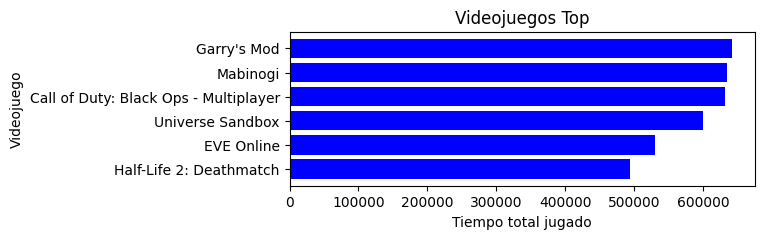

In [8]:
#Los juegos con mayor tiempo jugado
top_playtime = df_item.sort_values(by='playtime_forever', ascending=False).head(10)

plt.figure(figsize=(6, 2))  

plt.barh(top_playtime['item_name'], top_playtime['playtime_forever'], color='blue')
plt.xlabel('Tiempo total jugado')  
plt.ylabel('Videojuego')         
plt.title('Videojuegos Top') 

plt.gca().invert_yaxis()  

plt.show()

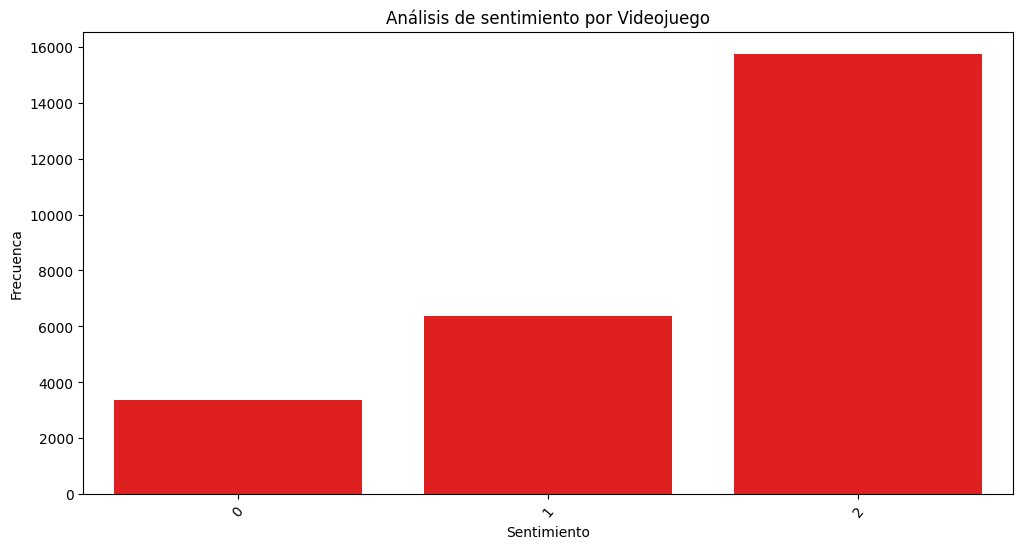

In [10]:
# Analizamos la distribución del análisis de sentimiento

Analisis_sentimiento = df_reviews['sentiment_analysis'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=Analisis_sentimiento.index, y=Analisis_sentimiento.values, color='red')
plt.xticks(rotation=50)

plt.xlabel('Sentimiento')
plt.ylabel('Frecuenca')
plt.title('Análisis de sentimiento por Videojuego')

plt.show()